<a href="https://colab.research.google.com/github/Dashnyam7/Scratch/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is clustering?

Clustering is a type of unsupervised learning that classifies data according to specific tendencies according to specific division criteria using only explanatory variables. The algorithm we have learned so far is an algorithm called supervised learning that creates a model in which the explanatory variables can explain the target variable. Clustering does not require a target variable, and classifies data into multiple classes using only explanatory variables.

Then, we will implement the clustering algorithm from here, but we will understand the detailed calculation method etc. as we implement it.

# Center point of k-means

The center of a cluster (center point or centroid) is the mean value of all points (elements) belonging to that cluster.

Below, we first initialize it randomly.

In [1]:
from sklearn.datasets import make_blobs  
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [2]:
import numpy as np
self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]

NameError: ignored

n_clustersis a hyperparameter for how many classes you want to classify into. After this, we will incorporate this processing into the class. At this point, I'm just going to excerpt it and leave it to the introduction.

# SSE of k-means

SSE (Sum of Squared Errors) is a statistical technique used to measure the sum of differences between:
The following formula can be defined from the actual value of the achieved value.

$\sum_{i=1}^{n} d^{2}$

where d is the distance between the data and the cluster center.
Sum of squared errors (SSE) is a formula used to measure the difference between obtained data.
Traditionally, SSE with predictive models is often used as a research reference to determine optimal clusters.

In [ ]:
def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

Line 1: Function definition.

Line 2: initial value of SSE as an argument

Line 3: Loop with the number of data

Line 4: Loop with the number of clusters

Line 5: Determine the last cluster and add it to the SSE if it is

Lines 6: Calculate the distance (norm) of the vector * Note that the numerical values ​​​​excluding the last cluster are used

Line 7: If the SSE is improved, update it

Line 8: Record the best SSE

Line 9: Record the best SSE myu

Line 10: Record the number of clusters

# Cluster of k-means

A cluster is a collection of data points aggregated by some kind of similarity.

The process of assigning a data point to a cluster is straightforward. It looks at all the clusters and then calculates the distance to the center point of the corresponding cluster. If the distance is smaller (closer) than the previous one, then it corresponds to the new close cluster. Each cluster will have a center point that is the average of the values ​​within that cluster. The final step is to repeat this process.

In [ ]:
def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j

Line 1: Function definition. Receive explanatory variable X as an argument

Line 2: Loop with the number of data Line

Line 3: Define the initial value for comparison Line

Line 4: Loop with the number of clusters

Line 5: Calculate the distance to the center point of the corresponding cluster

Line 6: If the distance is smaller than the previously saved (or initial value), adopt that cluster

Line 7: Update the value of dist_m

Line 8: Update the last cluster

In [ ]:
def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)

Line 1: Function definition. As an argument, the explanatory variable X is received

Line 2: Loop with the number of clusters 

Line 3: The average value of the explanatory variable values ​​corresponding to the clusters in the loop is set as the new center point

In [ ]:
def fit(self, X):
    for i in range(self.n_init):
        self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
        cluster = np.zeros(len(X))
        X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
        for j in range(self.n_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print("Initialization: %s Learning times: %s Best SSE: %s"%(i,j,self.best_sse))

Line 1: Function definition. 

Line 2: that receives explanatory variable X as an argument
Loop for the number of initializations

Line 3: Implemented in Problem 1. Randomly get initial values ​​for the number of clusters from data X (initial center point of each cluster)

Line 4 and 5: Add cluster columns to X vector (clusters are initialized with 0)

Line 6: Maximum Loop for learning times

Line 7: Update SSE Line

Line 8: Update cluster

Line 9: Update center point of cluster

Lines 10 to 11: Output of learning status

# Learning and Estimating

In [ ]:
class ScratchKMeans():
    def __init__(self,max_iter, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

In [ ]:
def predict(self, X):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
    return y_pred

Line 1: Function definition. Receives explanatory variable X as an argument

Line 2: Initialization of predicted values

​​Line 3: Loop with number of data

Line 4: Initial value for comparison

Line 5: Loop with number of clusters

Line 6: Relevant cluster Calculate the distance to the center point

Line 7: If the distance is smaller than the previously saved (or initial value), adopt that cluster

Line 8: Update dist_m Line

Line 9: Update predicted value

Line 10: Prediction return a value

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

In [ ]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=True)
clf.fit(X_train)

In [ ]:
pred = clf.predict(X_valid)

# Elbow method

The elbow method is a technique for determining the optimal number of clusters.
It is used in the following ways to generate optimal cluster number information.
Look at the comparative percentage of the number of clusters that form an elbow at a point.

In [ ]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

Line 1: Define SSE storage variable for each number of clusters

Line 2: Loop with arbitrary number of clusters

Line 3: Instantiate scratch class

Line 4: Execute learning Line

Line 5: Variable for SSE storage Store SSE

Lines 6 to 8: Draw cluster count and SSE

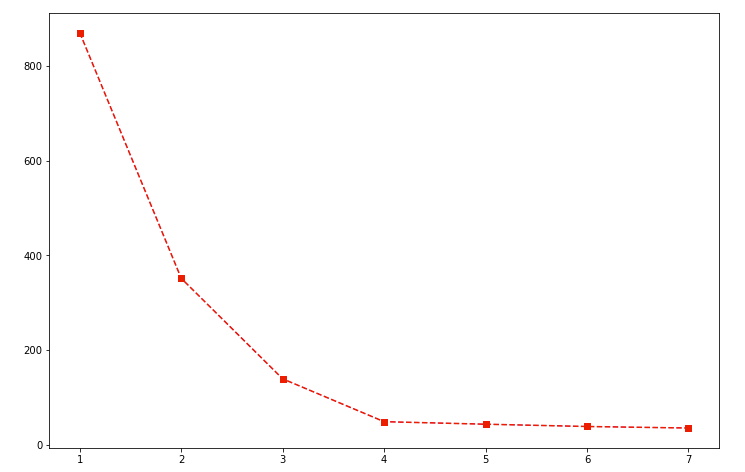

In the case of the graph above, the optimal number of clusters is 4.
The reason is that the decrease in SSE (sum of squared residuals) leveled off after 4 clusters. This means that the clustering results will have less error.
In addition, the name of the elbow method comes from the fact that the optimal number of clusters is the area that hits the elbow when the arm is bent.

# Test and Verification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
class ScratchKMeans():
    """
    Scratch implementation of K-means

    Parameters
    ----------
    n_clusters : int
      number of clusters
    n_init : int
      how many times to change the initial value of the center point
    max_iter : int
      Maximum number of iterations per calculation
    tol : float
      center point and centroid tolerance to stop the iteration
    verbose : bool
      True to print the learning process
    """
    def __init__(self, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

    def calc_sse(self,X):
            sse = 0
            for i in range(len(X)):
                for j in range(self.n_clusters):
                    if j == X[i,-1]:
                        sse += np.sum((X[i,:-1]-self.myu[j])**2)
            if self.best_sse > sse:
                self.best_sse = sse
                self.record_myu = self.myu
                self.record_cluster = self.n_clusters

    def _update_cluster(self,X):
            for i in range(len(X)):
                dist_m = 10**20
                for j in range(self.n_clusters):
                    dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                    if dist < dist_m:
                        dist_m = dist
                        X[i,-1] = j          

    def _update_myu(self,X):
            for j in range(self.n_clusters):
                self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)    



    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("Initialization: %s Learning times: %s Best SSE: %s"%(i,j,self.best_sse))

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Wholesale customers data.csv')
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

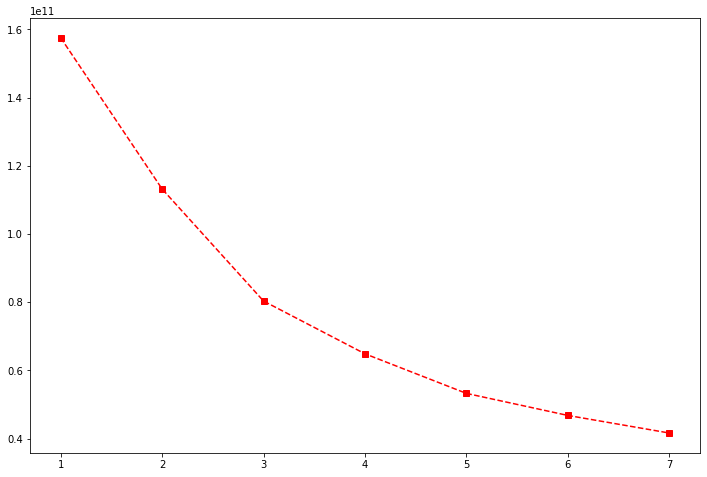

In [9]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

Let's say that the purpose of this analysis is to "analyze customer information, understand the characteristics of good customers and customers, and utilize them in the development of future measures." Then, if you divide into too many clusters, you will not have enough manpower and you will not be able to deploy beneficial measures.

Therefore, we decide to perform the analysis with 4 clusters this time.

In [10]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=False)
clf.fit(X)
pred = clf.predict(X)
summary_df = pd.DataFrame({'pred':pred,'Region':data['Region'],'Channel':data['Channel'],})

1st line: Instantiation with 4 clusters

2nd line: Execution of learning

3rd line: Calculation of predicted value

4th line: To make calculation easier, create DF only for predicted value/Region/Channel

Comparison with
Region Let's output the predicted value/the number of data for each Region.

In [11]:
pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)

pred,0.0,1.0,2.0,3.0
Region,,,,
1,2,16,10,49
2,1,12,4,30
3,8,67,44,197


Considering this result Region==3, many are classified into cluster 3 (pred3.0), Regionbut it can be said that others do not seem to have much influence on cluster determination. It can be said that there is a difference in the trend of the data due to Regionthe difference from this.

Comparison with
Channel Let's output the predicted value/the number of data for each channel.

In [12]:
pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)

pred,0.0,1.0,2.0,3.0
Channel,,,,
1,1,13,50,234
2,10,82,8,42


Considering the results, it can be said that many Chnnel==1are classified into cluster 3 (pred3.0), and many are classified into Chnnel==2cluster 1 (pred2.0). From this, it Channelcan be said that there is a difference in the tendency of the data depending on the difference.

In [13]:
data['cluster'] = pred

In [14]:
data.groupby('cluster').agg(['mean'])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,
0.0,1.909091,2.545455,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000
1.0,1.863158,2.536842,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
2.0,1.137931,2.586207,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
3.0,1.152174,2.536232,9087.463768,3027.427536,3753.514493,2817.985507,1003.003623,1040.525362
